
# Project: Investigating no a no show appointmnet Dataset 
#### Dataset consisting of medical appointments and show/no show status of the patients. 

The process will entail cleanign the data, carrying out various wringling and exloration activities and visualizing the dataset to investigate the diferent factors about the patients and how htey related ot their show/no show status.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset collects information about medical appoitnments in Brasil and is focused on whether patients show up for their appointments. It includes varisou attribtues about hte patients and their appointments as listed below:

### Data Disctionary
- ScheduleDay - day patients set up their appointment
- Neighbourhood - indicates location of the Hospital
- Scholarship - Indicates whether or not the patient is enrolled in Brasilain welfare program "Bolsa Familia
- No_show - indicates whether a patients showed up for their appointment (No) or whether they did not show up (yes)
- PatientId - patient identification
- AppointmentID - identification of each appointment
- Gender - male or female
- AppointmentDay - Day of the appointment
- Age - age of the patient
- Hipertension - whther patient has hipertension, yes or no
- Diabetes - whether patient has diabetes, yes or no
- Alcoholism - whether patient has alcoholism history, yes or no
- Handcap - whether patient has handicap, yes or no
- SMS_received - whether the patient received an SMS


### Questions to explore and answer
1. Does neighbourhood affect patients show up status for their appointments?
2. Does the patient's Health condition - diabetes, hypertension, handicap or alcoholic- affect thier no show status?
3. What propostion fo patients showed up compared to those that did not?
4. Relationship between shedule date and appointment date and no_show status.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Loading dataset
df_appoint = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_appoint.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df_appoint.shape

(110527, 14)

In [6]:
# list the names of the differnt columns in the dataset
df_appoint.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [21]:
df_appoint.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The age column has an outlier where the patient's age is listed as -1, this needs to be dropped.

In [22]:
# filtering dataset to only include viable values in age

df_appoint = df_appoint[df_appoint['Age'] != -1]

In [24]:
# Renaming the mispelled columns
cols = {"No-show": "No_Show", "Hipertension": "Hypertension", "Handcap": "Handicap"}
df_appoint.rename(columns = cols, 
                  inplace=True)


In [23]:
df_appoint.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hypertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handicap        110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No_Show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [30]:
df_appoint.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMS_received        int64
No_Show            object
dtype: object

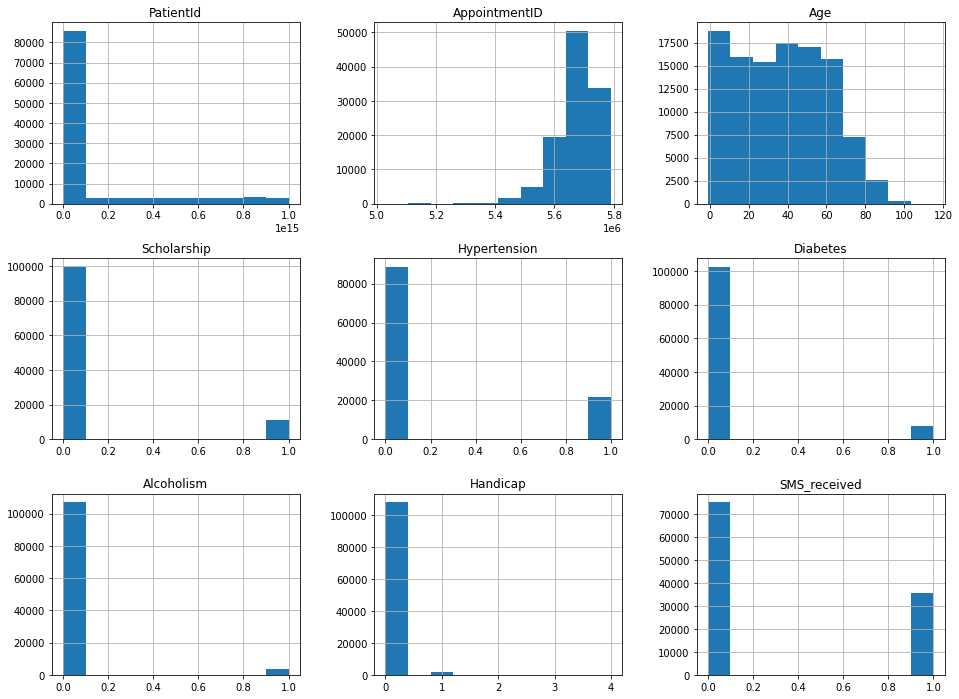

In [9]:
# histogram of the whole dataset
df_appoint.hist(figsize=(16, 12));

### Summary findings

- Most of the patients are aged between 20 and 70 years
- majority of the patients do not have Hypertension, Diabetes, Alcoholism, or Handicap
- More patients did not recieve an SMS compared ot those who received

### A few exploratory graphs on the numerical columns

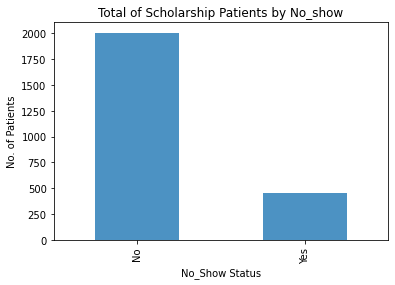

In [12]:
df_appoint.groupby(['No_Show'])['Handicap'].sum().plot(
    kind='bar', 
    title='Total of Scholarship Patients by No_show', alpha=.8);
plt.xlabel("No_Show Status");
plt.ylabel("No. of Patients");


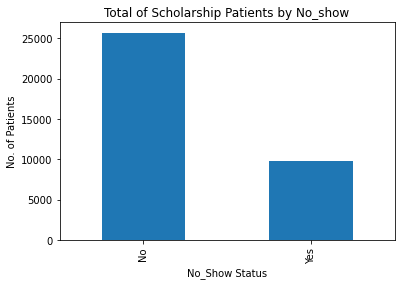

In [13]:
df_appoint.groupby(['No_Show'])['SMS_received'].sum().plot(
    kind='bar', 
    title='Total of Scholarship Patients by No_show');
plt.xlabel("No_Show Status");
plt.ylabel("No. of Patients");


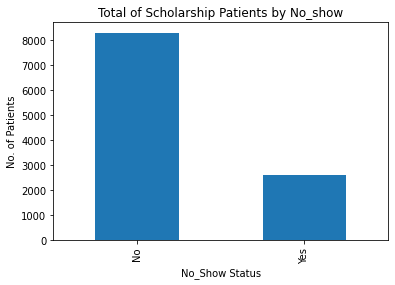

In [14]:
df_appoint.groupby(['No_Show'])['Scholarship'].sum().plot(
    kind='bar', 
    title='Total of Scholarship Patients by No_show');
plt.xlabel("No_Show Status");
plt.ylabel("No. of Patients");


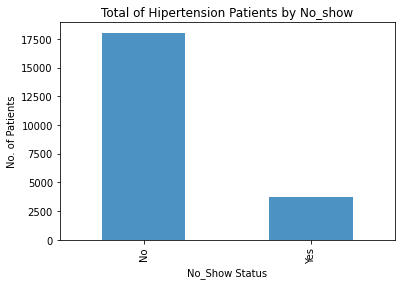

In [16]:
df_appoint.groupby(['No_Show'])['Hypertension'].sum().plot(
    kind='bar', 
    title='Total of Hipertension Patients by No_show', alpha=.8);
plt.xlabel("No_Show Status");
plt.ylabel("No. of Patients");


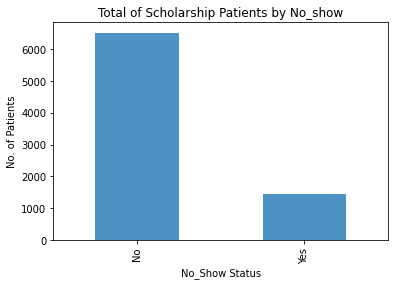

In [17]:
df_appoint.groupby(['No_Show'])['Diabetes'].sum().plot(
    kind='bar', 
    title='Total of Scholarship Patients by No_show', alpha=.8);
plt.xlabel("No_Show Status");
plt.ylabel("No. of Patients");


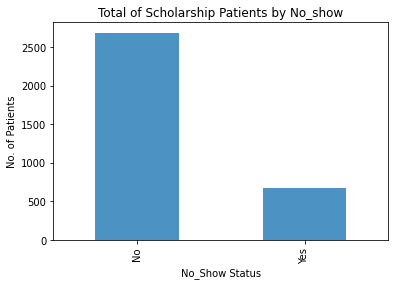

In [18]:
df_appoint.groupby(['No_Show'])['Alcoholism'].sum().plot(
    kind='bar', 
    title='Total of Scholarship Patients by No_show', alpha=.8);
plt.xlabel("No_Show Status");
plt.ylabel("No. of Patients");


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [19]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!